# Bitcoin Price Prediction:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.losses import Huber

## 1. Using NN and LSTM.

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
data=pd.read_csv('BTC-Daily.csv')

data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [26]:
data.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [27]:
data['date']=pd.to_datetime(data['date'])
data.sort_values('date',inplace=True)
dates=data['date']
dd=data.copy()

In [158]:
data['volatility']=data['close'].rolling(window=3).std()
data['volatility']=data['volatility'].fillna(method='bfill')

C:\Users\Kunal kulkarni\AppData\Local\Temp\ipykernel_15232\1102353091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['volatility']=data['volatility'].fillna(method='bfill')


In [159]:
data.sample(12)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,volatility
181,1630454400,2021-09-01,BTC/USD,47118.02,49134.00,46532.42,48853.49,2.194630e+03,1.072153e+08,1026.900984
2477,1432080000,2015-05-20,BTC/USD,231.69,234.86,231.00,233.80,1.794260e+06,7.681740e+03,1.094547
1421,1523318400,2018-04-10,BTC/USD,6782.39,6900.00,6653.21,6835.67,6.480193e+03,4.429646e+07,129.668050
510,1602028800,2020-10-07,BTC/USD,10602.31,10682.56,10547.71,10669.14,5.560249e+03,5.932308e+07,96.074801
1451,1520726400,2018-03-11,BTC/USD,8795.04,9768.37,8450.00,9535.04,1.640754e+04,1.564466e+08,373.776740
154,1632787200,2021-09-28,BTC/USD,42154.87,42778.93,40888.00,41049.00,2.246854e+03,9.223109e+07,1078.477468
2283,1448841600,2015-11-30,BTC/USD,371.48,383.00,367.11,377.98,6.688039e+06,1.777696e+04,11.022055
516,1601510400,2020-10-01,BTC/USD,10780.83,10940.22,10437.08,10622.71,8.678347e+03,9.218757e+07,110.485719
309,1619395200,2021-04-26,BTC/USD,49122.75,54404.78,48823.01,54073.41,6.046797e+03,3.269709e+08,2616.351475
2243,1452297600,2016-01-09,BTC/USD,452.02,454.00,446.68,449.95,1.947311e+06,4.330040e+03,4.187350


In [160]:
data.drop(['unix','date','symbol'],axis=1,inplace=True)
data.head()

,open,high,low,close,Volume BTC,Volume USD,volatility
2650,363.59,381.34,360.57,376.28,3220878.18,8617.15,1.837643
2649,376.42,386.60,372.25,376.72,2746157.05,7245.19,1.837643
2648,376.57,381.99,373.32,373.34,1145566.61,3046.33,1.837643
2647,376.40,382.31,373.03,378.39,2520662.37,6660.56,2.572800
2646,378.39,382.86,375.23,379.25,2593576.46,6832.53,3.192966


In [161]:
# X=data.drop('close',axis=1)
# y=data['close']

In [162]:
def create_sequences(X,y,window_size=30):
    Xs,ys=[],[]
    for i in range(window_size,len(X)):
        Xs.append(X[i-window_size:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

In [163]:
# scaler=MinMaxScaler(feature_range=(0,1))
# X=scaler.fit_transform(X)


# close_scaler=MinMaxScaler(feature_range=(0,1))
# y=close_scaler.fit_transform(data['close'].values.reshape(-1,1))

In [28]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
split_idx=int(0.75*len(data))
train_df,test_df=data.iloc[:split_idx],data.iloc[split_idx:]
test_dates=dates.iloc[split_idx:]

In [165]:
feature_scaler=MinMaxScaler()
target_scaler=MinMaxScaler()

In [166]:
X_train_raw=train_df.drop(['close'],axis=1).values
y_train_raw=train_df['close'].values.reshape(-1,1)
X_test_raw=test_df.drop(['close'],axis=1).values
y_test_raw=test_df['close'].values.reshape(-1,1)

X_train_scaled=feature_scaler.fit_transform(X_train_raw)
X_test_scaled=feature_scaler.fit_transform(X_test_raw)
y_train_scaled=target_scaler.fit_transform(y_train_raw)
y_test_scaled=target_scaler.fit_transform(y_test_raw)

In [167]:
window_size = 30
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, window_size)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test_scaled,  window_size)

In [168]:

model = Sequential([
    LSTM(64, input_shape=(window_size, X_train_seq.shape[2]), return_sequences=False, name='LSTM_Layer'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', name='Dense_1'),
    Dropout(0.3),
    Dense(1, activation='linear', name='Output')
])


D:\Coding-Configs\Python Config\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [169]:
model.compile(
    loss=Huber(delta=3000),
    optimizer='adam',
    metrics=['mae','mse']
)

In [170]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)                    │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,545 (80.25 KB)

 Trainable params: 20,417 (79.75 KB)

 Non-trainable params: 128 (512.00 B)

In [171]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3)

In [172]:
history=model.fit(X_train_seq,y_train_seq,
                 epochs=50,
                 batch_size=32,
                 validation_split=0.2,
                 callbacks=[early_stop,reduce_lr],
                 verbose=1)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.1159 - mae: 0.3209 - mse: 0.2319 - val_loss: 0.0805 - val_mae: 0.3922 - val_mse: 0.1611 - learning_rate: 0.0010
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0336 - mae: 0.1802 - mse: 0.0672 - val_loss: 0.0722 - val_mae: 0.3705 - val_mse: 0.1443 - learning_rate: 0.0010
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0186 - mae: 0.1344 - mse: 0.0373 - val_loss: 0.0648 - val_mae: 0.3502 - val_mse: 0.1296 - learning_rate: 0.0010
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0101 - mae: 0.1029 - mse: 0.0202 - val_loss: 0.0577 - val_mae: 0.3296 - val_mse: 0.1155 - learning_rate: 0.0010
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0079 - mae: 0.0862 - mse: 0.0157 - val_loss: 0.0491 - val_mae: 0.3027 - val_mse: 0.0981 - learning_rate: 0.0010
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0059 - mae: 0.0742 - mse: 0.0118 - val_loss: 0.0422 - val_mae: 0.2802 - v

In [173]:
y_pred_scaled=model.predict(X_test_seq)
y_preds=target_scaler.inverse_transform(y_pred_scaled)
y_true=target_scaler.inverse_transform(y_test_seq)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [174]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error, r2_score

MAE=mean_absolute_error(y_true,y_preds)
MSE=mean_squared_error(y_true,y_preds)
RMSE=root_mean_squared_error(y_true,y_preds)
r2score=r2_score(y_true,y_preds)

print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE:{RMSE}\nR2 Score: {r2score}")

MAE: 1744.4195412470383
MSE: 5459203.581527118
RMSE:2336.493865073717
R2 Score: 0.9824099975042606


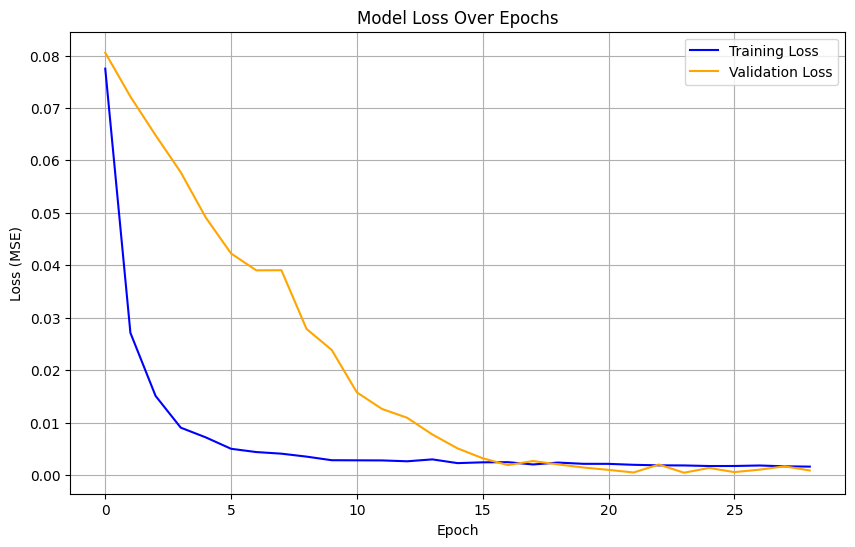

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# # Assuming you used MinMaxScaler or StandardScaler
# original_y_test = close_scaler.inverse_transform(y_test.reshape(-1, 1))
# original_predictions = close_scaler.inverse_transform(y_preds.reshape(-1, 1))


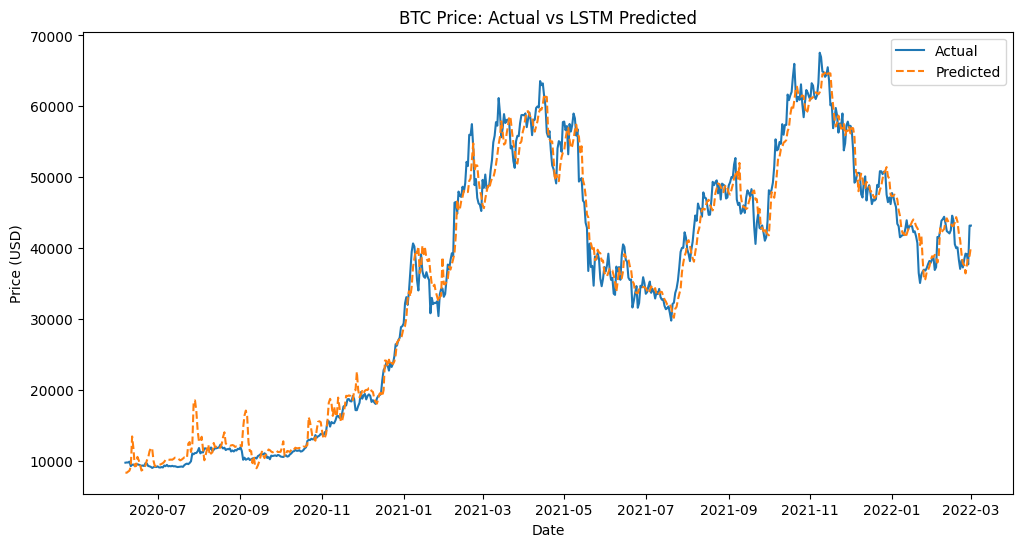

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(test_dates[window_size:], y_true, label='Actual')
plt.plot(test_dates[window_size:], y_preds, label='Predicted', linestyle='--')
plt.title('BTC Price: Actual vs LSTM Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [178]:
model.save('bitcoin_model.h5')
#print("\nModel saved successfully as 'bitcoin_improved_model.h5'")

## 2. Using SVM Regression.

In [14]:
data=pd.read_csv('BTC-Daily.csv')

In [15]:
data['volatility']=data['close'].rolling(window=3).std()
data['volatility']=data['volatility'].fillna(method='bfill')

C:\Users\Kunal kulkarni\AppData\Local\Temp\ipykernel_13336\1102353091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['volatility']=data['volatility'].fillna(method='bfill')


In [16]:
dates=data['date']
data.sort_values('date',inplace=True)

In [17]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,volatility
2650,1417132800,2014-11-28 00:00:00,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,1.837648
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,2.572803
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,3.192969
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,1.313678
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,7.479081


In [18]:
data.drop(['date','symbol','unix'],axis=1,inplace=True)
data.sample(5)

,open,high,low,close,Volume BTC,Volume USD,volatility
1242,6582.11,6595.69,6526.28,6544.08,2.022781e+03,1.323724e+07,30.391736
1417,7885.90,8232.14,7835.00,8000.41,8.935531e+03,7.148791e+07,191.980671
664,9040.00,9417.95,8921.03,9154.32,1.511094e+04,1.383304e+08,442.207400
100,59785.85,60090.55,58525.84,58678.47,8.956751e+02,5.255684e+07,1193.406769
2513,222.87,224.79,210.00,216.42,4.015453e+06,1.843286e+04,5.592309


In [19]:
from sklearn.model_selection import train_test_split
X=data.drop('close',axis=1)
y=data['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=10,)
svr.fit(X_train,y_train)

SVR(C=10)

In [21]:
y_preds=svr.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_preds)}")
print(f"R2 score: {r2_score(y_test,y_preds)}")

MAE: 9235.07899108803
MSE: 281765862.3773406
RMSE: 16785.88282984665
R2 score: -0.0294189044226405


In [34]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(y_test, label='Actual')
# plt.plot(y_preds, label='Predicted', linestyle='--')
# plt.title('BTC Price: Actual vs LSTM Predicted')
# plt.xlabel('Time Steps (or Index)')
# plt.ylabel('Price (USD)')
# plt.legend()
# plt.show()

## 3. Lasso Regression.

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score

data=pd.read_csv('BTC-Daily.csv')
data.sort_values('date',inplace=True)
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28 00:00:00,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [50]:
data['volatility']=data['close'].rolling(window=3).std()
data['volatility']=data['volatility'].fillna(method='bfill')

C:\Users\Kunal kulkarni\AppData\Local\Temp\ipykernel_13336\1102353091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['volatility']=data['volatility'].fillna(method='bfill')


In [51]:
data.drop(['unix','date','symbol'],axis=1,inplace=True)

In [52]:
X=data.drop('close',axis=1)
y=data['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
alpha=0.1
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

D:\Coding-Configs\Python Config\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.893e+08, tolerance: 5.670e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [54]:
y_preds=lasso.predict(X_test)

In [55]:
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_preds)}")
print(f"R2 score: {r2_score(y_test,y_preds)}")

MAE: 188.77645729876994
MSE: 187753.15960558737
RMSE: 433.30492681896357
R2 score: 0.999264466341697


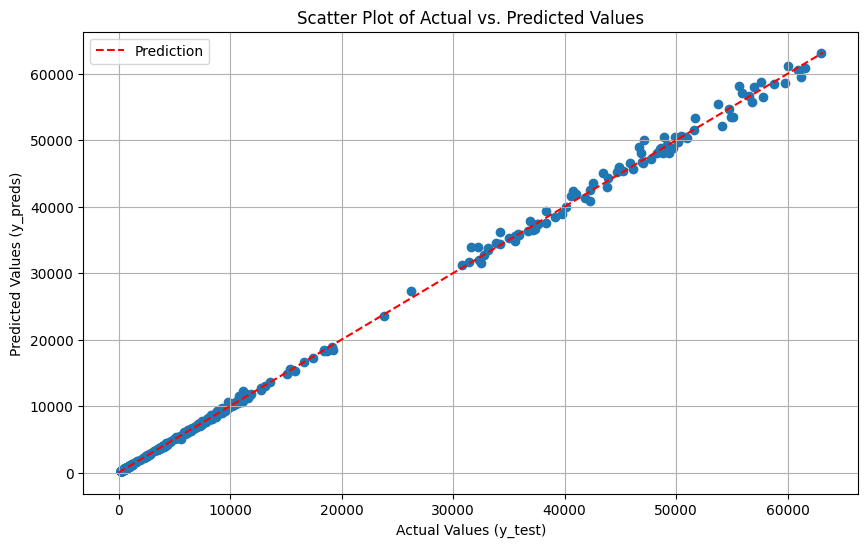

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_preds)')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)  # Add a grid for easier comparison

# Add a line of perfect prediction (y=x) for reference
max_val = max(max(y_test), max(y_preds))  # Find the maximum value for the plot range
plt.plot([0, max_val], [0, max_val], 'r--', label='Prediction')  # Red dashed line
plt.legend()
plt.show()

In [61]:
coefficients = pd.Series(lasso.coef_, index=X_train.columns)
print("Coefficients learned by the Lasso model:")
print(coefficients)

Coefficients learned by the Lasso model:
open         -1.379371e-02
high          7.444368e-01
low           2.638086e-01
Volume BTC   -3.544967e-07
Volume USD   -1.557350e-07
volatility   -1.914433e-01
dtype: float64


## 4. Elastic Net.

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score

data=pd.read_csv('BTC-Daily.csv')
data.sort_values('date',inplace=True)
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28 00:00:00,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [90]:
data['volatility']=data['close'].rolling(window=3).std()
data['volatility']=data['volatility'].fillna(method='bfill')

C:\Users\Kunal kulkarni\AppData\Local\Temp\ipykernel_13336\1102353091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['volatility']=data['volatility'].fillna(method='bfill')


In [91]:
data.drop(['unix','date','symbol'],axis=1,inplace=True)

In [92]:
X=data.drop('close',axis=1)
y=data['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
from sklearn.linear_model import ElasticNet

alpha=0.1
l1_ratio=0.6
elastic_net=ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

elastic_net.fit(X_train,y_train)

D:\Coding-Configs\Python Config\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+08, tolerance: 5.477e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1, l1_ratio=0.6)

In [94]:
y_prds=elastic_net.predict(X_test)

In [95]:
print(f"MAE: {mean_absolute_error(y_test,y_prds)}")
print(f"MSE: {mean_squared_error(y_test,y_prds)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_prds)}")
print(f"R2 score: {r2_score(y_test,y_prds)}")

MAE: 201.19721181324715
MSE: 185752.60329513068
RMSE: 430.9902589329957
R2 score: 0.9993607805334619


In [87]:
elastic_net.predict([[43895.6,45501,44091.56,2591.801,114276569.736438,20.3]])

D:\Coding-Configs\Python Config\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


array([44882.18384248])

## 5. RidgeCV.

In [107]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score

data=pd.read_csv('BTC-Daily.csv')
data.sort_values('date',inplace=True)
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28 00:00:00,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [108]:
data['volatility']=data['close'].rolling(window=3).std()
data['volatility']=data['volatility'].fillna(method='bfill')

C:\Users\Kunal kulkarni\AppData\Local\Temp\ipykernel_13336\1102353091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['volatility']=data['volatility'].fillna(method='bfill')


In [109]:
data.drop(['unix','date','symbol'],axis=1,inplace=True)

In [110]:
X=data.drop('close',axis=1)
y=data['close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [115]:
from sklearn.linear_model import RidgeCV

alpha=1.0
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge()

In [116]:
y_pred=ridge.predict(X_test)

In [117]:
print(f"MAE: {mean_absolute_error(y_test,y_prds)}")
print(f"MSE: {mean_squared_error(y_test,y_prds)}")
print(f"RMSE: {root_mean_squared_error(y_test,y_prds)}")
print(f"R2 score: {r2_score(y_test,y_prds)}")

MAE: 14999.037053695874
MSE: 527423160.65487754
RMSE: 22965.69530092389
R2 score: -1.078099702944411
